In [1]:
import pandas as pd


In [2]:
import numpy as np
import os

In [21]:
import pandas as pd

# Define the path to your file
file_path = "data/train_data.txt"

# Initialize an empty list to store the parsed data
data = []

# Open the file and read line by line
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        # Strip whitespace and newline characters, then split by ':::'
        parsed_line = [field.strip() for field in line.strip().split(':::')]
        data.append(parsed_line)

# Create a DataFrame from the parsed data

df = pd.DataFrame(data, columns=['ID', 'Title', 'Genre', 'Description'])

# Convert ID to numeric
df['ID'] = pd.to_numeric(df['ID'])

# Display the first few rows of the dataframe to verify
print(df.head())


   ID                             Title     Genre  \
0   1      Oscar et la dame rose (2009)     drama   
1   2                      Cupid (1997)  thriller   
2   3  Young, Wild and Wonderful (1980)     adult   
3   4             The Secret Sin (1915)     drama   
4   5            The Unrecovered (2007)     drama   

                                         Description  
0  Listening in to a conversation between his doc...  
1  A brother and sister with a past incestuous re...  
2  As the bus empties the students for their fiel...  
3  To help their unemployed father make ends meet...  
4  The film's title refers not only to the un-rec...  


In [22]:
df.head(5)

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [23]:
df.shape

(54214, 4)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [25]:
df.isnull().sum()

ID             0
Title          0
Genre          0
Description    0
dtype: int64

In [26]:
df.duplicated().sum()

0

In [28]:
df['num_characters'] = df['Description'].apply(len)


In [29]:
df.head(10)

,ID,Title,Genre,Description,num_characters
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,545
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,183
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,649
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,1081
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,624
5,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm s...,1608
6,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all ...,344
7,8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen w...,331
8,9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss ...",455
9,10,Spirits (2014/I),horror,Four high school students embark on a terrifyi...,425


In [30]:
df.describe()

,ID,num_characters
count,54214.000000,54214.000000
mean,27107.500000,599.452429
std,15650.378084,446.026620
min,1.000000,41.000000
25%,13554.250000,324.000000
50%,27107.500000,463.000000
75%,40660.750000,712.000000
max,54214.000000,10503.000000


In [34]:
df['Genre'].unique()

array(['drama', 'thriller', 'adult', 'documentary', 'comedy', 'crime',
       'reality-tv', 'horror', 'sport', 'animation', 'action', 'fantasy',
       'short', 'sci-fi', 'music', 'adventure', 'talk-show', 'western',
       'family', 'mystery', 'history', 'news', 'biography', 'romance',
       'game-show', 'musical', 'war'], dtype=object)

In [35]:
df.drop(columns = ['ID', 'num_characters'], axis = 1, inplace = True)

In [36]:
df['Description'][5]

'Quality Control consists of a series of 16mm single take shots filmed in the summer of 2010,over a two day period, in a dry cleaners facility in Pritchard, Alabama, near Mobile, Quality Control exhibits the acts as well the conditions around labor and showcases, in Everson\'s words "the fine folks of Alabama producing a superior product." It is similar stylistically, in form and rhythm, to certain scenarios in Everson\'s award-winning and critically acclaimed previous films, including Erie (IFFR 2010) and in thematic concerns to several other short form works which follow the daily, quotidian tasks of workers in rest and in motion, and is an oblique sequel, ten years hence, to Everson\'s Creative Capital granted project A Week in the Hole (2001), which focused on an employee\'s adjustment to materials, time, space and personnel. Quality Control consists of a series of 16mm single take shots, filmed over a two day period in the summer of 2010, in a dry cleaners facility in Pritchard, A

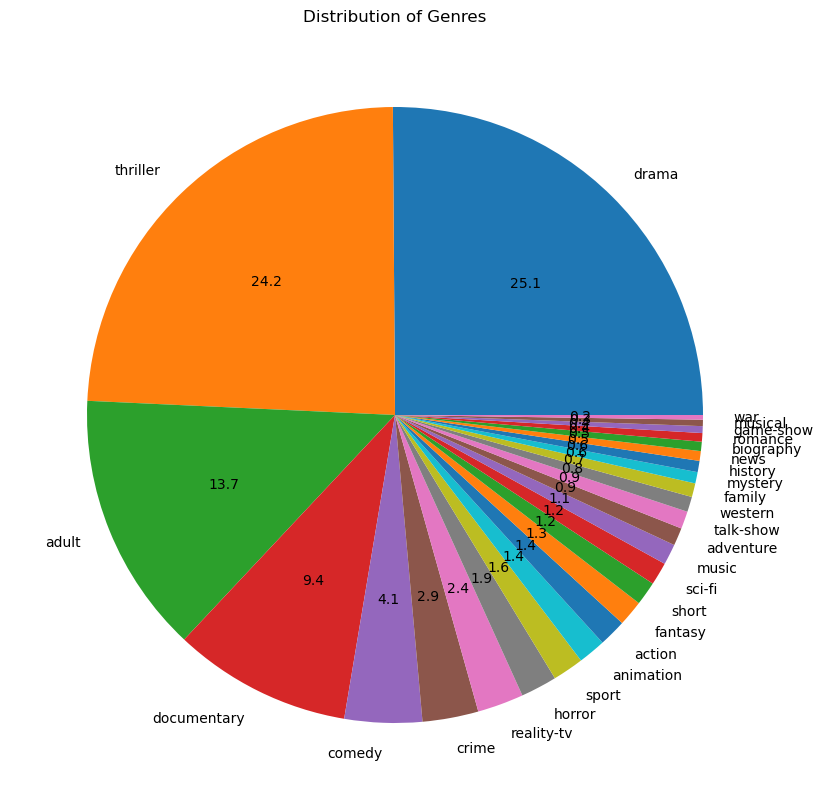

In [44]:
import matplotlib.pyplot as plt

# Assuming df['Genre'] contains categorical values
labels = ['drama', 'thriller', 'adult', 'documentary', 'comedy', 'crime', 'reality-tv', 'horror', 'sport', 'animation', 'action', 'fantasy', 'short', 'sci-fi', 'music', 'adventure', 'talk-show', 'western', 'family', 'mystery', 'history', 'news', 'biography', 'romance', 'game-show', 'musical', 'war']
plt.figure(figsize=(12, 10))
# Plotting the pie chart
plt.pie(df['Genre'].value_counts(), labels=labels, autopct="%0.1f")
plt.title('Distribution of Genres')
plt.show()


In [46]:
df['Description'][2]

'As the bus empties the students for their field trip to the Museum of Natural History, little does the tour guide suspect that the students are there for more than just another tour. First, during the lecture films, the coeds drift into dreams of the most erotic fantasies one can imagine. After the films, they release the emotion of the fantasies in the most erotic and uncommon ways. One slips off to the curator\'s office for a little "acquisition. " Another finds the anthropologist to see what bones can be identified. Even the head teacher isn\'t immune. Soon the tour is over, but as the bus departs, everyone admits it was quite an education.'

In [60]:
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [61]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [64]:
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [65]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        text=y[:]
        y.clear()
        for i in text:
            y.append(ps.stem(i))
    return " ".join(y)

In [66]:
df['transformed_desc'] = df['Description'].apply(transform_text)

In [73]:
df['transformed_desc'][5]

'qualiti control consist seri 16mm singl take shot film summer 2010 two day period dri cleaner facil pritchard alabama near mobil qualiti control exhibit act well condit around labor showca everson word fine folk alabama produc superior product similar stylist form rhythm certain scenario everson critic acclaim previou film includ eri iffr 2010 themat concern sever short form work follow daili quotidian task worker rest motion obliqu sequel ten year henc everson creativ capit grant project week hole 2001 focu employ adjust materi time space personnel qualiti control consist seri 16mm singl take shot film two day period summer 2010 dri cleaner facil pritchard alabama near mobil qualiti control exhibit act well condit around labor similar stylist form rhythm certain scenario everson critic acclaim previou film includ eri iffr 2010 themat concern sever short form work follow daili quotidian task worker rest motion includ factori routin captur short film week hole 2001 focu employ adjust m

In [76]:
df.head(5)

,Title,Genre,Description,transformed_desc
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,listen conver doctor parent oscar learn nobodi...
1,Cupid (1997),thriller,A brother and sister with a past incestuous re...,brother sister past incestu relationship curre...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,bu empti student field trip museum natur histo...
3,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,help unemploy father make end meet edith twin ...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,film titl refer bodi ground zero also state na...


# Now we generate word cloud to see the most frequent words in the description of different genres

In [77]:
from wordcloud import WordCloud
wc = WordCloud(width=600,height=600,min_font_size=10,background_color='white')

In [107]:
thriller_wc = wc.generate(df[df['Genre'] == 'thriller']['transformed_desc'].str.cat(sep=" "))


# Thriller

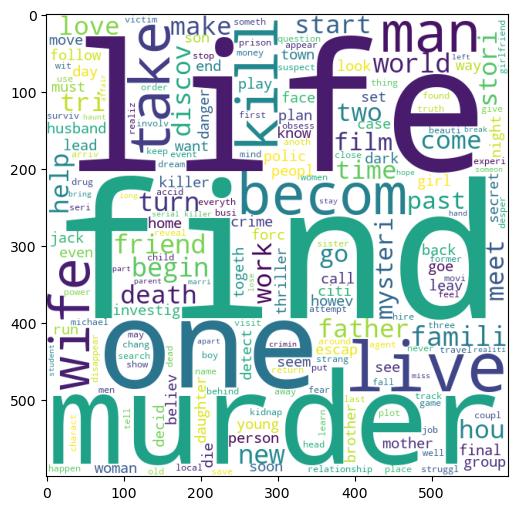

In [108]:
plt.figure(figsize=(15,6))
plt.imshow(thriller_wc)

In [109]:
drama_wc = wc.generate(df[df['Genre'] == 'drama']['transformed_desc'].str.cat(sep=" "))


# Drama

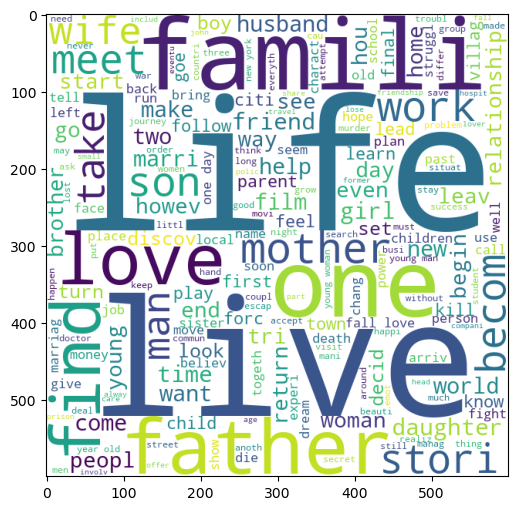

In [110]:
plt.figure(figsize=(15,6))
plt.imshow(drama_wc)

In [111]:

documentary_wc = wc.generate(df[df['Genre'] == 'documentary']['transformed_desc'].str.cat(sep=" "))


# Documentary

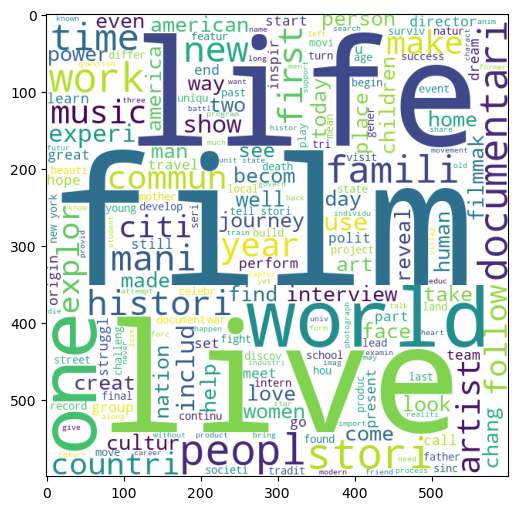

In [112]:
plt.figure(figsize=(15,6))
plt.imshow(documentary_wc)

In [113]:
comedy_wc = wc.generate(df[df['Genre'] == 'comedy']['transformed_desc'].str.cat(sep=" "))

# Comedy

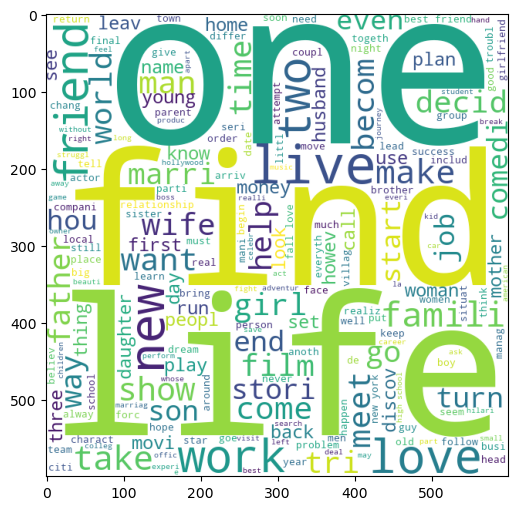

In [114]:
plt.figure(figsize=(15,6))
plt.imshow(documentary_wc)

In [117]:
genres= [df['Genre']=='drama', df['Genre']=='comedy', df['Genre']=='adult', df['Genre']=='romance',df['Genre']=='thriller',
             df['Genre']=='documentary']
choices = [1,2,3,4,5,6]
df['labels'] = np.select(genres, choices, 0)

In [165]:
df.head(3)

,Title,Genre,Description,transformed_desc,labels
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,listen conver doctor parent oscar learn nobodi...,1
1,Cupid (1997),thriller,A brother and sister with a past incestuous re...,brother sister past incestu relationship curre...,5
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,bu empti student field trip museum natur histo...,3


In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data to create TF-IDF features
X = vectorizer.fit_transform(df['transformed_desc'])

# Your target variable
y = df['labels']


In [168]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [169]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)


C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [171]:
y_predict=log_reg.predict(X_test)

In [173]:
print(accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))


0.6364474776353408
[[2361  495  170    1    0   13  438]
 [ 531 1823  157    1    0    5  170]
 [ 368  351  716    1    0    1   42]
 [  65   15   33   21    0    0    2]
 [  18  111   28    0    1    0    3]
 [ 150  107   15    0    0   11    4]
 [ 431  184   30    0    1    1 1968]]


In [174]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_predict, average='micro')
print("Micro-averaged Precision:", precision)


Micro-averaged Precision: 0.6364474776353408


In [188]:
y_test = np.array(y_test)


In [194]:
y_test

array([1, 0, 1, ..., 6, 2, 1])

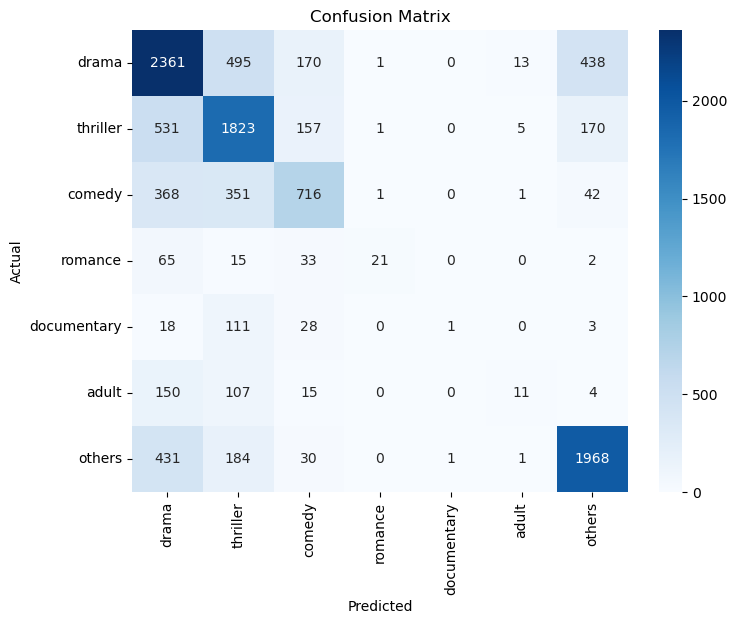

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["drama", "thriller", "comedy", "romance", "documentary","adult","others"],
            yticklabels=["drama", "thriller", "comedy", "romance", "documentary","adult","others"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [198]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [201]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)


In [204]:
accuracy = accuracy_score(y_test,y_pred2)
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred2, average='micro')
print("Micro-averaged Precision:", precision)
print("accuracy_score:",accuracy)

Micro-averaged Precision: 0.5411786405976206
accuracy_score: 0.5411786405976206


In [205]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)

In [ ]:
svc.fit(X_train,y_train)
y_pred3 = svc.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred3)
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred3, average='micro')
print("Micro-averaged Precision:", precision)
print("accuracy_score:",accuracy)